In [350]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [351]:
plt.style.use('seaborn')

In [352]:
mean1 = np.array([1.0,0.5])
cov1 = np.array([[1,0.1],[0.1,1.2]])

dataset1 = np.random.multivariate_normal(mean1,cov1,400)

In [353]:
mean2 = np.array([4.0,5.0])
cov2 = np.array([[1.21,0.1],[0.1,1.3]])

dataset2 = np.random.multivariate_normal(mean2,cov2,400)

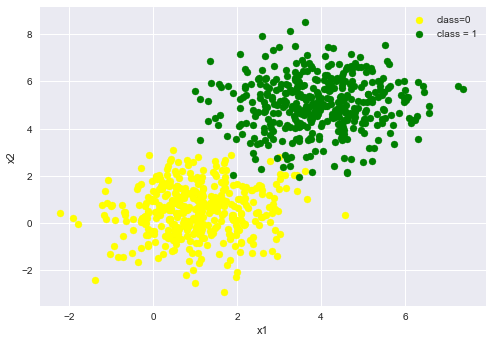

In [354]:
plt.scatter(dataset1[:,0],dataset1[:,1],color = 'yellow',label = 'class=0')
plt.scatter(dataset2[:,0],dataset2[:,1],color = 'green',label = 'class = 1')
plt.ylabel('x2')
plt.xlabel('x1')
plt.legend()
plt.show()

In [355]:
ones = np.ones((dataset2.shape[0],1),dtype = int)
zeros = np.zeros((dataset1.shape[0],1),dtype = int)
dataset1 = np.hstack((dataset1,zeros))
dataset2 = np.hstack((dataset2,ones))
dataset1.shape,dataset2.shape

((400, 3), (400, 3))

In [356]:
data = np.vstack((dataset1,dataset2))
#np.random.shuffle(data)
print(data.shape)
split = int(0.8*data.shape[0])
split

(800, 3)


640

In [357]:
x_train,y_train = data[:split,:-1],data[:split,-1]
x_test,y_test = data[split:,:-1],data[split:,-1]

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((640, 2), (640,), (160, 2), (160,))

In [358]:
def hypothesis(x,theta):
    m = x.shape[0]
    ans = theta[0]
    for i in range(m):
        ans += x[i]*theta[i+1]
    final_ans = 1.0 + math.exp(-(ans))
    return 1.0/final_ans

def predict(x,theta):
    confidence = hypothesis(x,theta)
    if confidence >= 0.5:
        return 1.0
    else:
        return 0.0
    
def get_error(X,Y,theta):
    m = X.shape[0]
    e = 0.0
    for i in range(X.shape[0]):
        e += (Y[i]*math.log2(hypothesis(X[i],theta))) + ((1 - Y[i])*math.log2(1 - hypothesis(X[i],theta)))
    return -e/m

def get_accuracy(x_test,y_test,theta):
    pred_y = []
    for i in range(x_test.shape[0]):
        y = predict(x_test[i],theta)
        pred_y.append(y)
    
    predict_y = np.array(pred_y)
    return float(((y_test == predict_y).sum())/x_test.shape[0])

def get_gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((X.shape[1]+1,))
    for i in range(X.shape[0]):
        grad[0] += (Y[i] - hypothesis(X[i],theta))
        for j in range(X.shape[1]):
            grad[j+1] += (Y[i] - hypothesis(X[i],theta))*X[i][j]
    return grad/m

def get_theta(X,Y,learning_rate = 0.1):
    n = X.shape[1]+1
    m = X.shape[0]
    
    theta = np.random.random((n,))
    error_list = []
    accuracy_list = []
    #itr = 0;
    error_curr = get_error(X,Y,theta)
    while(error_curr > 0.1):
        gradient = get_gradient(X,Y,theta)
        theta = theta + learning_rate*gradient
        
        error_curr = get_error(X,Y,theta)
        error_list.append(error_curr)
        
        accuracy = get_accuracy(X,Y,theta)
        accuracy_list.append(accuracy)
        
        #itr+=1
    return (theta,error_list,accuracy_list)



In [359]:
ftheta,error,accuracy = get_theta(x_train,y_train)

In [360]:
ftheta

array([-4.99119848,  0.60253531,  1.33198129])

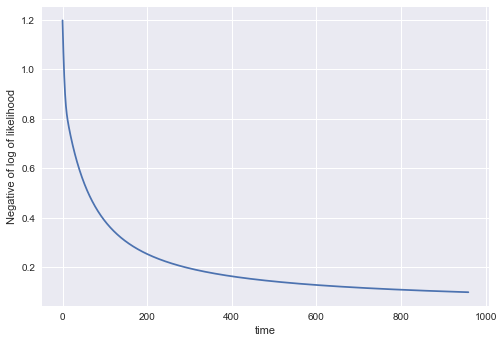

0.0999761142221934


In [361]:
plt.plot(error)
plt.xlabel('time')
plt.ylabel('Negative of log of likelihood')
plt.show()
print(error[-1])

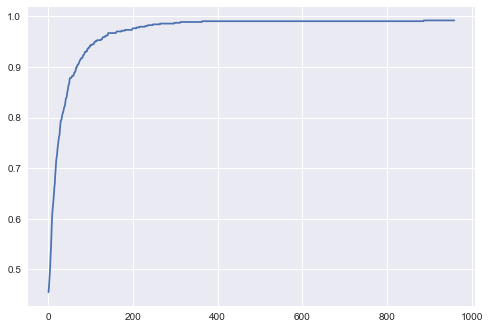

0.9921875


In [362]:
plt.plot(accuracy)
plt.show()
print(accuracy[-1])

In [363]:
ftheta

array([-4.99119848,  0.60253531,  1.33198129])

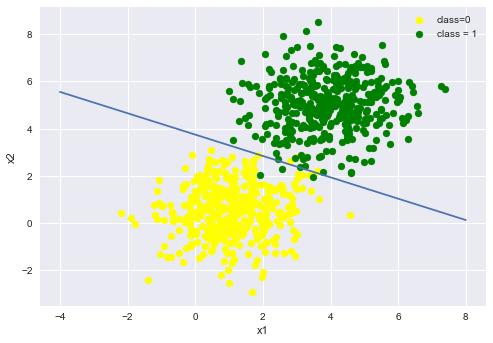

In [364]:
plt.scatter(dataset1[:,0],dataset1[:,1],color = 'yellow',label = 'class=0')
plt.scatter(dataset2[:,0],dataset2[:,1],color = 'green',label = 'class = 1')
plt.ylabel('x2')
plt.xlabel('x1')
plt.legend()

#ax + by + c = 0  => y = -(ax + c)/b => x2 = -(x1*theta[1] + theta[0])/theta[2]
xpts = np.linspace(-4,8,10)
ypts = -(xpts*ftheta[1] + ftheta[0])/ftheta[2]
plt.plot(xpts,ypts)
plt.show()